In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import drive
%matplotlib inline 
sns.set(style="ticks")

In [63]:
#Загружаю данные
data = pd.read_csv('Desktop/AppleStore.csv', sep=",")

In [64]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [65]:
data.shape

(7197, 17)

In [66]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [67]:
data.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [68]:
#пропущенных значений нет, сделаем их сами
data.loc[0::300, ['ipadSc_urls.num', ]] = np.nan # каждая 300ая строка содержит пропущенные
data.loc[0::30, ['sup_devices.num', ]] = np.nan # каждая 30ая строка содержит пропущенные
data.loc[0::3000, ['lang.num', ]] = np.nan # каждая 3000ая строка содержит пропущенные

In [69]:
data.isnull().sum()

Unnamed: 0            0
id                    0
track_name            0
size_bytes            0
currency              0
price                 0
rating_count_tot      0
rating_count_ver      0
user_rating           0
user_rating_ver       0
ver                   0
cont_rating           0
prime_genre           0
sup_devices.num     240
ipadSc_urls.num      24
lang.num              3
vpp_lic               0
dtype: int64

In [70]:
data_col = data.dropna(axis=1, how='any')
(data.shape, data_col.shape)

((7197, 17), (7197, 14))

In [71]:
data_str = data.dropna(axis=0, how='any')
print(data.shape, data_str.shape)
round(data_str.shape[0]/data.shape[0], 2)

(7197, 17) (6957, 17)


0.97

Потеряли 3% датасета

In [72]:
num_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count>0 and (col_type=='float64' or col_type=='int64'):
        num_cols.append(col)
        temp_perc = round((null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, temp_perc))

Колонка sup_devices.num. Тип данных float64. Количество пустых значений 240, 3.33%.
Колонка ipadSc_urls.num. Тип данных float64. Количество пустых значений 24, 0.33%.
Колонка lang.num. Тип данных float64. Количество пустых значений 3, 0.04%.


In [73]:
null_index = data[data['lang.num'].isnull()].index
null_index

Int64Index([0, 3000, 6000], dtype='int64')

In [74]:
null_index = data[data['ipadSc_urls.num'].isnull()].index
null_index

Int64Index([   0,  300,  600,  900, 1200, 1500, 1800, 2100, 2400, 2700, 3000,
            3300, 3600, 3900, 4200, 4500, 4800, 5100, 5400, 5700, 6000, 6300,
            6600, 6900],
           dtype='int64')

In [75]:
null_index = data[data['sup_devices.num'].isnull()].index
null_index

Int64Index([   0,   30,   60,   90,  120,  150,  180,  210,  240,  270,
            ...
            6900, 6930, 6960, 6990, 7020, 7050, 7080, 7110, 7140, 7170],
           dtype='int64', length=240)

In [76]:
data[data.index.isin(null_index)]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,NaN,NaN,NaN,1
30,34,288429040,LinkedIn,273844224,USD,0.00,71856,62,3.5,4.5,9.1.32,4+,Social Networking,NaN,2.0,23.0,1
60,69,297430070,Target,138754048,USD,0.00,108131,13,3.0,2.0,8.21.0,4+,Shopping,NaN,0.0,1.0,1
90,103,304871622,Zombieville USA,27962441,USD,0.99,32988,2489,4.0,4.0,1.7,12+,Games,NaN,5.0,1.0,1
120,135,309187846,SFR TV,122153984,USD,0.00,46,0,3.0,0.0,7.3.0,4+,Entertainment,NaN,5.0,1.0,1
150,171,317469184,"ESPN: Get scores, news, alerts & watch live sp...",51538944,USD,0.00,290996,150,3.5,3.5,5.7.1,4+,Sports,NaN,5.0,2.0,1
180,204,325462190,PGA Championship 2016 – Baltusrol Golf Club,64147456,USD,0.00,10472,58,3.5,2.0,8.1,17+,Sports,NaN,5.0,1.0,0
210,239,331259725,央视影音-海量央视内容高清直播,54648832,USD,0.00,2070,0,2.5,0.0,6.2.0,4+,Sports,NaN,0.0,1.0,1
240,272,336477530,Plane Finder - Flight Tracker,52632576,USD,3.99,1438,171,4.0,4.0,9.4.1,4+,Navigation,NaN,3.0,10.0,1
270,304,342138881,Sing Karaoke Songs Unlimited with StarMaker,91267072,USD,0.00,26227,7,4.0,4.5,6.0.3,9+,Music,NaN,4.0,14.0,1


In [77]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [78]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['lang.num']])
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['lang.num']])
data_num_imp[mask_missing_values_only]

array([5.43438977, 5.43438977, 5.43438977])

In [79]:
#Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['ipadSc_urls.num']])
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['ipadSc_urls.num']])
data_num_imp[mask_missing_values_only]

array([3.70835076, 3.70835076, 3.70835076, 3.70835076, 3.70835076,
       3.70835076, 3.70835076, 3.70835076, 3.70835076, 3.70835076,
       3.70835076, 3.70835076, 3.70835076, 3.70835076, 3.70835076,
       3.70835076, 3.70835076, 3.70835076, 3.70835076, 3.70835076,
       3.70835076, 3.70835076, 3.70835076, 3.70835076])

In [80]:
#Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['sup_devices.num']])
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['sup_devices.num']])
data_num_imp[mask_missing_values_only]

array([37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34670116,
       37.34670116, 37.34670116, 37.34670116, 37.34670116, 37.34

Теперь надо разобраться с пропусками в категориальных фичах. Я выберу те колонки, в которых меньше всего пропущенных значений.

In [82]:
num_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count>0 and (col_type=='object'):
        num_cols.append(col)
        temp_perc = round((null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, temp_perc))

In [83]:
#пропущенных значений нет, сделаем их сами
data.loc[0::3000, ['currency', ]] = np.nan # каждая 3000ая строка содержит пропущенные
data.loc[0::30, ['track_name', ]] = np.nan # каждая 30ая строка содержит пропущенные
data.loc[0::300, ['prime_genre', ]] = np.nan # каждая 300ая строка содержит пропущенные

In [84]:
num_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count>0 and (col_type=='object'):
        num_cols.append(col)
        temp_perc = round((null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, temp_perc))

Колонка track_name. Тип данных object. Количество пустых значений 240, 3.33%.
Колонка currency. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка prime_genre. Тип данных object. Количество пустых значений 24, 0.33%.


In [85]:
cat_temp_data = data[['currency']]
cat_temp_data.head()

,currency
0,NaN
1,USD
2,USD
3,USD
4,USD


In [86]:
cat_temp_data['currency'].unique()

array([nan, 'USD'], dtype=object)

In [87]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['USD'],
       ['USD'],
       ['USD'],
       ...,
       ['USD'],
       ['USD'],
       ['USD']], dtype=object)

In [88]:
np.unique(data_imp2)

array(['USD'], dtype=object)

In [89]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='<3')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['<3'],
       ['USD'],
       ['USD'],
       ...,
       ['USD'],
       ['USD'],
       ['USD']], dtype=object)

In [90]:
np.unique(data_imp3)

array(['<3', 'USD'], dtype=object)

# Преобразование категориальных признаков в числовые

In [92]:
#Загружаю данные
data = pd.read_csv('Desktop/AppleStore.csv', sep=",")

In [93]:
data.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [94]:
#пропущенных значений нет, сделаем их сами
data.loc[0::300, ['ipadSc_urls.num', ]] = np.nan # каждая 300ая строка содержит пропущенные
data.loc[0::30, ['sup_devices.num', ]] = np.nan # каждая 30ая строка содержит пропущенные
data.loc[0::3000, ['lang.num', ]] = np.nan # каждая 3000ая строка содержит пропущенные
data.loc[0::3000, ['currency', ]] = np.nan # каждая 3000ая строка содержит пропущенные
data.loc[0::30, ['track_name', ]] = np.nan # каждая 30ая строка содержит пропущенные

In [95]:
data.isnull().sum()

Unnamed: 0            0
id                    0
track_name          240
size_bytes            0
currency              3
price                 0
rating_count_tot      0
rating_count_ver      0
user_rating           0
user_rating_ver       0
ver                   0
cont_rating           0
prime_genre           0
sup_devices.num     240
ipadSc_urls.num      24
lang.num              3
vpp_lic               0
dtype: int64

В пункте "prime_genre" нет ни одного нулевого значения. Именно поэтому далее я буду рассматривать его. В этой колонке описывается категория, к которой относится приложение.

In [96]:
data.shape

(7197, 17)

In [97]:
cat_data = data[['prime_genre']]

In [98]:
print(data['prime_genre'].unique().size)
data['prime_genre'].unique()

23


array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

Видно, что всего уникальных значений у этого признака - 23. Следовательно, этот признак можно закодировать целочисленными значениями.

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [101]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data[['prime_genre']])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [103]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

array(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment',
       'Finance', 'Food & Drink', 'Games', 'Health & Fitness',
       'Lifestyle', 'Medical', 'Music', 'Navigation', 'News',
       'Photo & Video', 'Productivity', 'Reference', 'Shopping',
       'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'],
      dtype=object)

In [104]:
print(data['currency'].unique().size)
data['currency'].unique()

2


array([nan, 'USD'], dtype=object)

Так как в типе есть 3 пропущенных значения, я просто удалю строки, в которых оно содержится.

In [105]:
data = data.dropna(axis=0, how='any')
data.shape

(6957, 17)

In [106]:
print(data['currency'].unique().size)
data['currency'].unique()

1


array(['USD'], dtype=object)

In [107]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['currency']])

In [108]:
data[['currency']].shape

(6957, 1)

In [109]:
cat_enc_ohe.shape

(6957, 1)

In [110]:
cat_enc_ohe.todense()[6030:6040]

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [111]:
data[['currency']][6030:6040]

,currency
6238,USD
6239,USD
6241,USD
6242,USD
6243,USD
6244,USD
6245,USD
6246,USD
6247,USD
6248,USD


In [112]:
pd.get_dummies(data[['currency']])[6030:6040]

,currency_USD
6238,1
6239,1
6241,1
6242,1
6243,1
6244,1
6245,1
6246,1
6247,1
6248,1


# Масштабирование данных

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

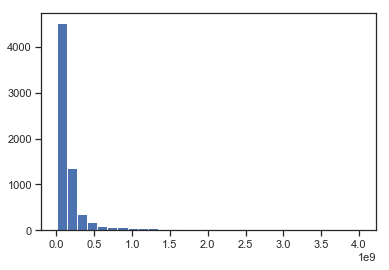

In [114]:
plt.hist(data['size_bytes'], 30)
plt.show()

In [115]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['size_bytes']])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


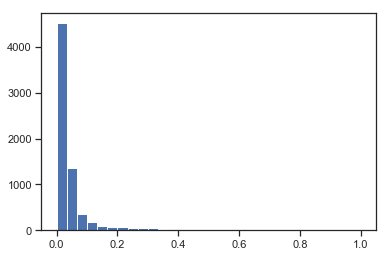

In [116]:
plt.hist(sc1_data, 30)
plt.show()

Масштабирование данных на основе Z-оценки - StandardScaler

In [117]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['size_bytes']])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


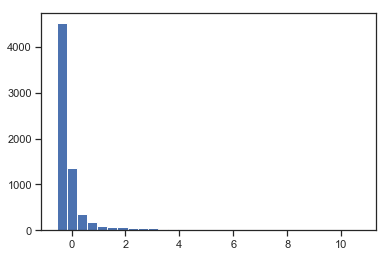

In [118]:
plt.hist(sc2_data, 30)
plt.show()

# Нормализация данных

In [119]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['size_bytes']])

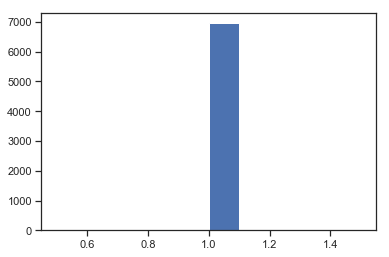

In [120]:
plt.hist(sc3_data, 10)
plt.show()